### Glass detection

[Data Source](https://archive.ics.uci.edu/ml/datasets/glass+identification)

#### Objectives

- Discuss the possible handicaps of OLS algorithm in classification problems.

- Define odds and log-odds

- Describe the logistic regression model

- Employ a logistic regression model 

- Define likelihood function and maximum likelihood approach

- Compare the interpretation of coefficients in OLS and LR

#### Why not linear regression?

Consider a case where we would like to diagnoise a symptom: 

possible cases are: stroke, drug overdose, seizure

Idea-I: Y - {stroke:1, drug overdose:2, seizure:3} then apply linear regression!

Q: What is the problem in this approach?

Second scenerio:

Suppose we have three categories: mild, moderate, severe and we would like to diagnoise a symptom given predictors(variables) $X_{1}, \cdots X_{p}$. 

Q: Can we use linear regression with the labeling y - {mild:1, moderate:2, severe:3}?

Q: What if we would have only two category: mild and severe?

### Logistic Regression 

Consider again the Default data set, where the response default falls into one of two categories, Yes or No. Rather than modeling this response Y directly, logistic regression models the probability that Y belongs to a par- ticular category.

#### The logistic model

1. $$ p(X) = \frac{e^{\beta_{0} + \beta_{1}X}}{1 + e^{\beta_{0} + \beta_{1}X}}$$

2. Mention odds

3. log-odds or logits --> what is the interpretation of $\beta_{i}$ in terms of logits

#### How do we find $\beta_{i}$?

- Maximum likelihood - note that non-linear least square could still be an option

- Define likelihood function

#### Predictions with sklearn

#### Multiple regression case

- apply logistic regression with sklearn and then discuss the interpretation of coefficients

- credit card dataset and comparison with ISLR?


#### More than two categories?

#### Pros and cons?

#### Model evaluation

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [7]:
balance_df = pd.read_csv('../data/Credit.csv', index_col = 0 )

balance_df.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
7,20.996,3388,259,2,37,12,Female,No,No,African American,203
8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


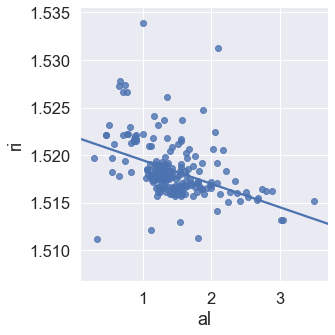

In [37]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

In [38]:
from sklearn.linear_model import LinearRegression
import numpy as np
linreg = LinearRegression().fit(glass.al.values.reshape(-1, 1), glass.ri)
# compute prediction for al=2 using the predict method
linreg.predict(np.array([[2]]))

array([1.51699012])

In [40]:
# examine glass_type
glass.glass_type.value_counts().sort_index()
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


Text(0, 0.5, 'household')

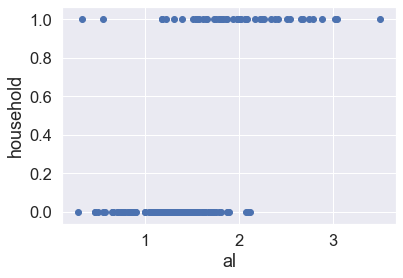

In [41]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [42]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

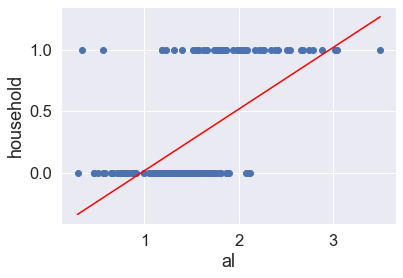

In [44]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')
plt.show()

In [45]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0


Text(0, 0.5, 'household')

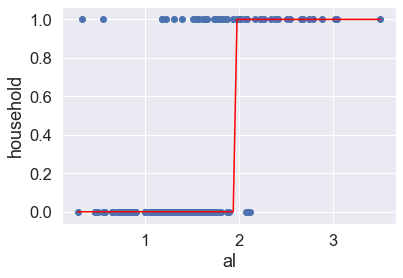

In [46]:


# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')



In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

In [20]:
x = np.arange(40)
y = np.where(x > 19, 1,0)


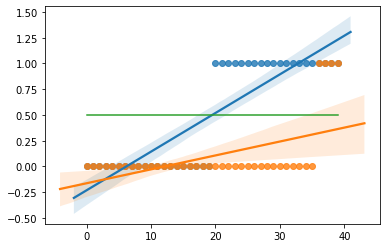

In [23]:
sn.regplot(x,y)
sn.lineplot(x, y = 0.5, )

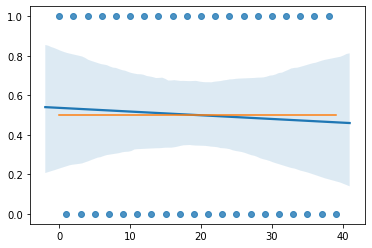

In [27]:
y_prime = np.where(x%2 == 0, 1, 0 )
sn.regplot(x, y_prime)
sn.lineplot(x, y = 0.5, )

In [ ]:
pd.read_csv(../)

In [33]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(C = 1e5)

lg.fit(x.reshape(-1,1), y.reshape(-1,1))

lg.score(x.reshape(-1,1), y.reshape(-1,1))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [34]:
lg.predict(x.reshape(-1,1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [2]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id', 'ri', 'na', 'mg', 'al',
             'si', 'k', 'ca', 'ba', 'fe', 'glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values(by=['al'], inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1
